Задача 1 Даны значения величины заработной платы заемщиков банка (zp) и значения их
поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические
операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату
(то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая
переменная). Произвести расчет как с использованием intercept, так и без.

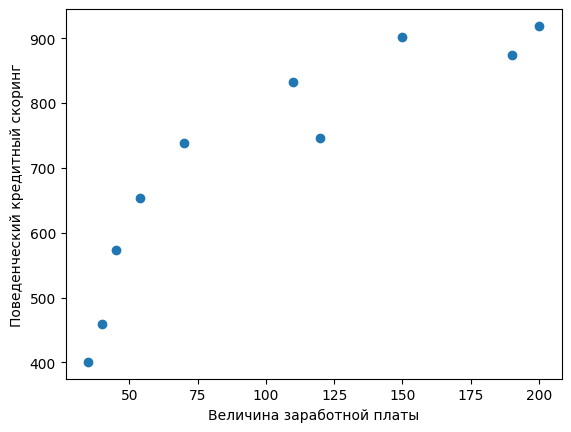

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
x=np.array(zp)
y=np.array(ks)

plt.scatter(x,y)
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг')
plt.show()


In [104]:
Mzp = sum(zp)/len(zp) # 101.4
Mks = sum(ks)/len(ks) # 709.9
cov1 = sum((zp[i] - Mzp) * (ks[i] - Mks) for i in range(len(zp))) / (len(zp) -1) # если выборка
std_zp = (sum((i - Mzp) ** 2 for i in zp) / (len(zp) - 1)) ** 0.5 
std_ks = (sum((i - Mks) ** 2 for i in ks) / (len(ks) - 1)) ** 0.5 
R1 = cov1 / (std_zp * std_ks) # 0.8875
print(cov1) # 10175.38 для выборки
print(R1) # 0.8875 - это значит прослеживается сильная линейная зависимость

10175.377777777778
0.8874900920739162


y = b0 +  b1*x - функция парной линейной регрессии

In [105]:
b1=(sum(zp[i]*ks[i] for i in range(len(zp)))/len(zp)-Mzp*Mks) / (sum(zp[i]**2 for i in range(len(zp)))/len(zp) - Mzp ** 2)
b1

2.620538882402765

In [106]:
b0=Mks-b1*Mzp
b0

444.1773573243596

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


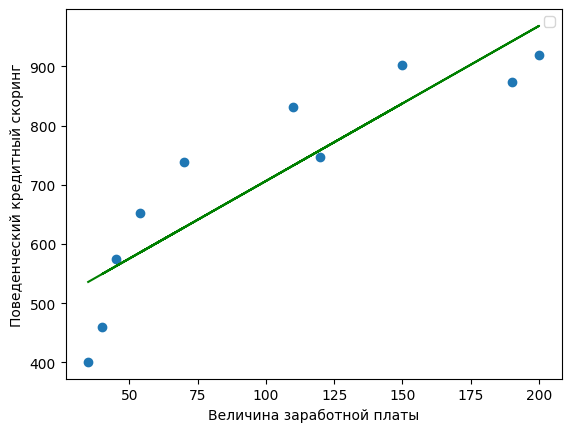

In [107]:
plt.scatter(x,y)
plt.plot(x, b0 + b1 * x, c='g')
plt.legend()
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг')
plt.show()

In [108]:
x=x.reshape((len(x),1))
x
y=y.reshape((len(y),1))
y
X=np.hstack([np.ones((len(x),1)),x])
X
b=np.dot(np.linalg.inv(np.dot(X.T,X)),X.T @ y)
b

array([[444.17735732],
       [  2.62053888]])

In [109]:
x3=x.reshape((len(x),1))
x3
y3=y.reshape((len(y),1))
y3
b3=np.dot(np.linalg.inv(np.dot(x3.T,x3)),x3.T @ y3)
b3

array([[5.88982042]])

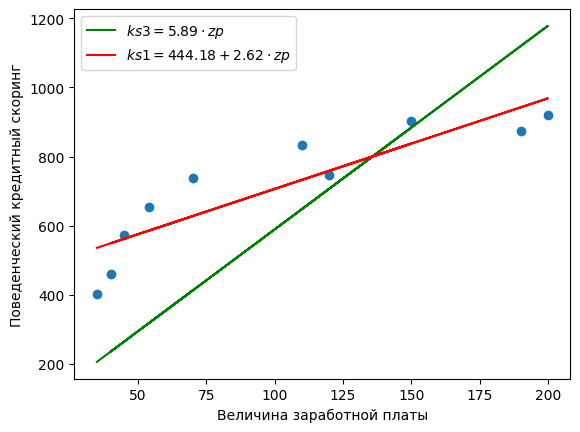

In [110]:
plt.scatter(x3,y3)
plt.plot(x3,  b3 * x3, c='g', label=r'$ks3=5.89\cdot zp$')
plt.plot(x, b0 + b1 * x, c='r', label=r'$ks1=444.18+2.62\cdot zp$')
plt.legend()
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг')
plt.show()

Задача 2 Посчитать коэффициент линейной регрессии при заработной плате (zp), используя
градиентный спуск (без intercept).

In [114]:
def y_pred(b):
    y=[(b * x[i]) for i in range(len(x))]# предсказанные значения кредитного скоринга
    return y

def mse_(b,pred):
    x=sum([(pred[i]-y[i])**2 for i in range(len(y))])/len(y)
    return x

b4=0.1
alfa=0.000001
verification=0
for i in range(1,1001):
    b4-=round(alfa*(2/len(x))*np.sum((b4*x-y)*x),6)
    if b4-verification<0.00000001:
        print("")
        print(f"Коэффициент линейной регрессии b1 = {b4},а mse = {mse_(b4,y_pred(b4))[0]}")
        break
    verification=b4
    if i%100==0:
        print(f"номер итерации: {i}, b1 = {b4}, mse = {mse_(b4,y_pred(b4))[0]}")

номер итерации: 100, b1 = 5.535620999999998, mse = 58245.2324798238
номер итерации: 200, b1 = 5.868153000000005, mse = 56523.32621386923
номер итерации: 300, b1 = 5.888497000000008, mse = 56516.882544619395
номер итерации: 400, b1 = 5.889738000000009, mse = 56516.85850930493

Коэффициент линейной регрессии b1 = 5.889803000000018,а mse = 56516.85841990006


Задача 3 (Дополнительно) Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что
изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно
влиять на изменение другого во время одной итерации).

In [112]:
# b0=444.17735732
def y_pred_1(b):
    y=[(b0 + b * x[i]) for i in range(len(x))]# предсказанные значения кредитного скоринга
    return y
b0=100
b5=1
alfa1=0.0001
alfa2=0.00001
verification1=0
verification2=0
for i in range(1,2000000):
    b0-=alfa1*(2/len(x))*np.sum((b0+b5*x-y))
    b5-=alfa2*(2/len(x))*np.sum((b0+b5*x-y)*x)
    if b5-verification1<0.0000001 and b0-verification2<0.0000001:
        print("")
        print(f"Коэффициент линейной регрессии b0 = {b0}, b1 = {b5},а mse = {mse_(b5,y_pred_1(b5))[0]}")
        break
    verification1=b5
    verification2=b0
    if i%100000==0:
        print(f"номер итерации: {i}, b0 = {b0}, b1 = {b5}, mse = {mse_(b5,y_pred_1(b5))[0]}")

номер итерации: 100000, b0 = 442.02011124190085, b1 = 2.636418992589827, mse = 6471.594684334545
номер итерации: 200000, b0 = 444.16382404685856, b1 = 2.620638504759091, mse = 6470.414247635287

Коэффициент линейной регрессии b0 = 444.175385579623, b1 = 2.620553396984079,а mse = 6470.414202162852
